In [15]:
import sys, os
import csv, json
import pandas as pd
import re
from summarizer import Summarizer
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df_train = pd.read_csv('df_reddit_train.csv')

,Unnamed: 0,sentence1,upvote,sentence2,score
0,0,"So I live away from my half brother, who lives...",2,That makes step dad much more sympathetic.,1.098612
1,1,It’s almost every three to four hours like clo...,8,Aged 2 and 9 months and she sleeps through 30%...,2.197225
2,2,"Not only that, the price for a single bottle w...",281,**The Teacher Lounge Raid*** Potential Take: 1...,5.641907
3,3,"This is not the job I signed up for, I am so e...",14,This virus took what I loved and felt a sense ...,2.708050
4,4,[Light],174,That’s definitely something I would do too.,5.164786
...,...,...,...,...,...
35010,35010,Sometimes shit happens you couldn't see coming...,611,Don't expose yourself to new information about...,6.416732
35011,35011,I am 16M and I usually do not visit my friends...,19,I just wanted to say this is the most adorable...,2.995732
35012,35012,I’m a girl and I always wanted to ask a guy ou...,1499,I appreciate the gesture but have no interest ...,7.313220
35013,35013,But today I realized that he was not kidding.,8,You are a goddess. Share your victories loud a...,2.197225


In [27]:
counselchat_df = pd.read_csv('../counsel-chat/data/20200325_counsel_chat.csv')

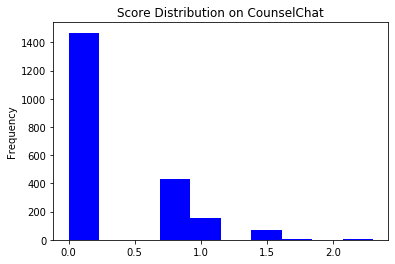

In [33]:
counselchat_df['score'] = counselchat_df['upvotes'].copy()
counselchat_df['score'] = counselchat_df['score'].apply(lambda x: np.log1p(x) if x != -1 else 0)

counselchat_df['score'].plot(
    kind='hist',
    bins=10,
    color='blue',
    title= 'Score Distribution on CounselChat')
plt.show()

In [11]:
reddit_df = pd.read_csv('../text_reddit_v1.csv')

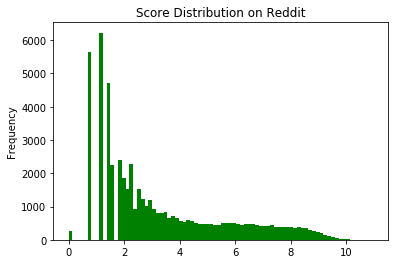

In [35]:
reddit_df['score'] = reddit_df['upvote'].copy()
reddit_df['score'] = reddit_df['score'].apply(lambda x: np.log1p(x) if x != -1 else 0)

reddit_df['score'].plot(
    kind='hist',
    bins=80,
    color='green',
    title= 'Score Distribution on Reddit')
plt.show()

In [5]:
df_train

,Unnamed: 0,sentence1,upvote,sentence2,score
0,0,They all have cats. Usually more than one. I'm...,232,Claritin®,5.451038
1,1,Finally back in work with my second NF after 6...,4,Lazy parenting results in headache children. E...,1.609438
2,2,"I was playing piano in my room, when my mom sa...",788,*_PRAISE THE HOLY SNITCH_*,6.670766
3,3,I've got a friend group of about 9 of us. We'r...,69,Kind of a dick move on your part if you feel t...,4.248495
4,4,"For starters, I’m already married and my husba...",7264,It is your special day and it's your call. Onl...,8.890824
...,...,...,...,...,...
44228,44228,Lately I’ve been seeing a huge influx of posts...,2,This. Thank you 💖,1.098612
44229,44229,I'm having a birthday party for my 5 year old ...,7,I've experienced this in the past as a parent ...,2.079442
44230,44230,Long title but I think its necessary. I'm gonn...,59,Don’t let her take your daughter. It seems lik...,4.094345
44231,44231,"Hello there,Due to financial issues and uni I ...",2,I don't think it's helpful for you - or Reddit...,1.098612


In [ ]:
df = pd.read_csv('text.csv')

## Train Dataset

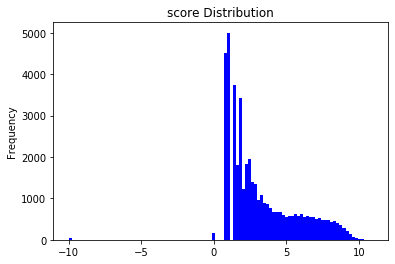

In [3]:
p = df_train['score'].plot(
    kind='hist',
    bins=100,
    color='blue',
    title= 'score Distribution')
plt.show()

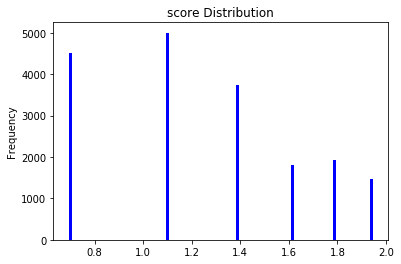

In [4]:
temp = df_train[(df_train['score'] > 0) & (df_train['score'] <= 2)]
p = temp['score'].plot(
    kind='hist',
    bins=100,
    color='blue',
    title='score Distribution')

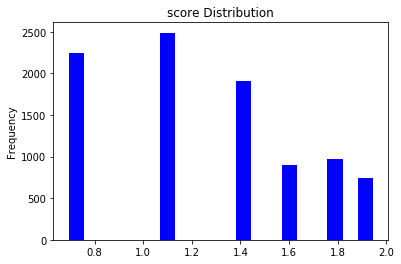

In [5]:
remove_n = len(temp)//2
drop_indices = np.random.choice(temp.index, remove_n, replace=False)
temp_subset = temp.drop(drop_indices)

p = temp_subset['score'].plot(
    kind='hist',
    bins=20,
    color='blue',
    title='score Distribution')

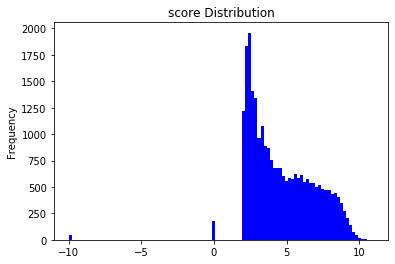

In [6]:
df_train.drop(temp.index)['score'].plot(
    kind='hist',
    bins=100,
    color='blue',
    title='score Distribution')
plt.show()
#df_train.drop(temp.index)

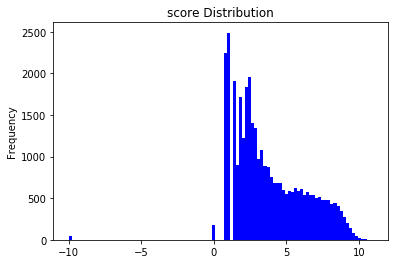

In [7]:
df_train.drop(temp.index).append(temp_subset)['score'].plot(
    kind='hist',
    bins=100,
    color='blue',
    title='score Distribution')

In [9]:
new_df_train = df_train.drop(temp.index).append(temp_subset)
new_df_train.to_csv('df_reddit_train.csv')

In [10]:
new_df_train.describe()

,Unnamed: 0,upvote,score
count,34996.000000,34996.000000,34996.000000
mean,22071.101726,682.948508,3.747241
std,12766.907224,2028.324455,2.441477
min,0.000000,-1.000000,-10.000000
25%,11022.750000,6.000000,1.945910
50%,22013.500000,21.000000,3.091042
75%,33088.500000,257.000000,5.552960
max,44232.000000,57713.000000,10.963255


In [3]:
df_test = pd.read_csv('df_reddit_test.csv')

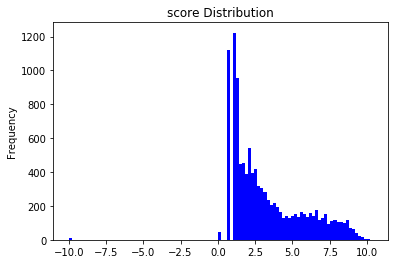

In [4]:
p = df_test['score'].plot(
    kind='hist',
    bins=100,
    color='blue',
    title= 'score Distribution')
plt.show()